# Crime Rate Analysis by Neighborhood
In the provided Python code, the objective was to analyze and visualize the crime rates among different neighborhoods using a dataset named "Arrests.csv". The code utilizes the pandas library to read the CSV file and store the data in a DataFrame. The dataset contains thousand of individual arrests incidence related to arrests, with a specific focus on the neighborhood where each incident occurred.

The analysis begins by creating a series called arrests_per_neighborhood, which represents the count of arrests in each neighborhood. Subsequently, the code extracts the top 20 neighborhoods with the highest number of arrests and creates a bar graph to visualize this information. The visualization is generated using the Seaborn and Matplotlib libraries, where Seaborn's barplot function is employed to create a horizontal bar graph.

The resulting visualization provides a clear representation of the top 20 neighborhoods with the highest arrest counts, aiding in the identification and comparison of crime rates across different areas. The graph includes labels for the number of arrests on the x-axis and the respective neighborhoods on the y-axis, making it an effective tool for understanding the distribution of arrests across neighborhoods.

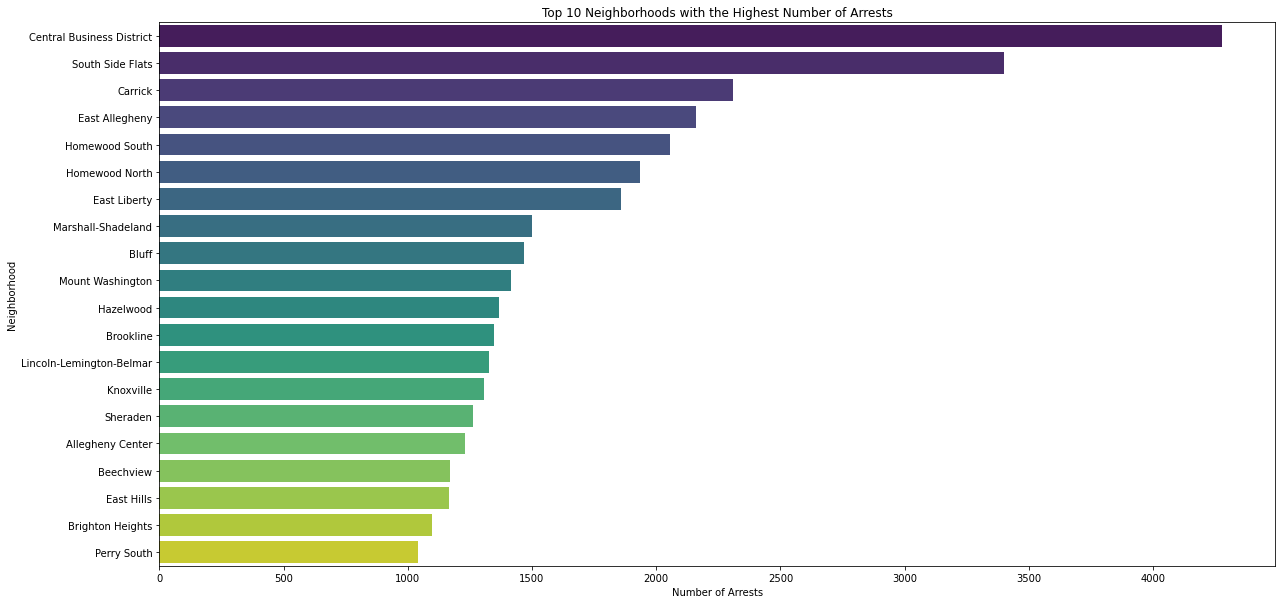

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Arrests.csv")


arrests_per_neighborhood = data['INCIDENTNEIGHBORHOOD'].value_counts()

top_20_neighborhoods = arrests_per_neighborhood.head(20)

# Create a bar graph using Seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x=top_20_neighborhoods.values, y=top_20_neighborhoods.index, palette='viridis')
plt.title('Top 10 Neighborhoods with the Highest Number of Arrests')
plt.xlabel('Number of Arrests')
plt.ylabel('Neighborhood')
plt.show()


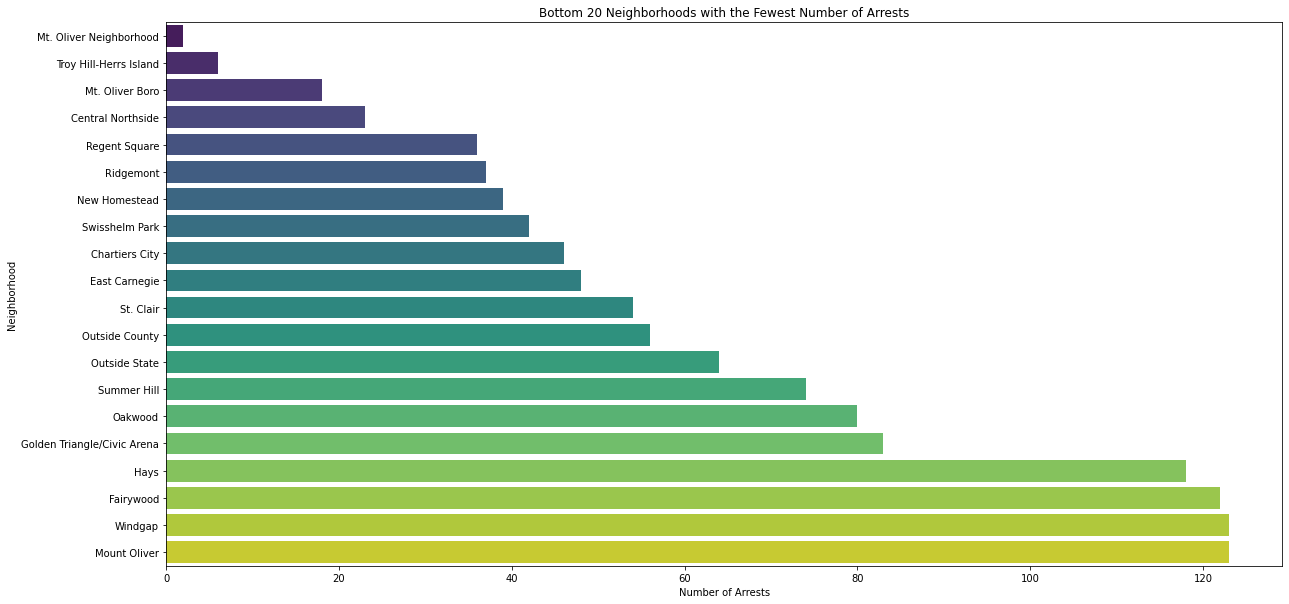

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Arrests.csv")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Arrests.csv")

arrests_per_neighborhood = data['INCIDENTNEIGHBORHOOD'].value_counts()

# Sort the series in ascending order and get the first 20 (lowest)
bottom_20_neighborhoods = arrests_per_neighborhood.sort_values().head(20)

# Display the neighborhoods with the lowest number of arrests

# Create a bar graph
plt.figure(figsize=(20, 10))
sns.barplot(x=bottom_20_neighborhoods.values, y=bottom_20_neighborhoods.index, palette='viridis')
plt.title('Bottom 20 Neighborhoods with the Fewest Number of Arrests')
plt.xlabel('Number of Arrests')
plt.ylabel('Neighborhood')
plt.show()



# Arrest Data Conclusion 
Based on the analysis of crime rates, the best neighborhoods are identified by examining those with the fewest number of arrests, including MT Oliver, Regent Square, Troy-Hill-Herrs Island, and Central Northside. Conversely, the worst neighborhoods, in terms of crime rates, are observed to be Central Business District (Downtown), South Side Flats, and Carrick. It's noteworthy that this information will be incorporated into the overall neighborhood assessment, with a substantial weight of 45%. This underscores the significant impact of crime rates on the overall metric, reflecting the prioritization of safety and security in the comprehensive evaluation of neighborhood quality.